In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as st

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

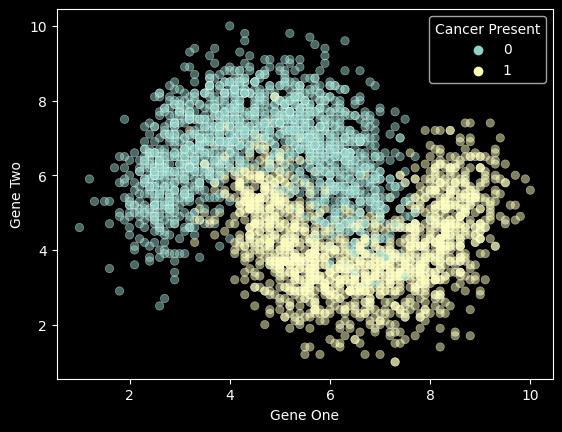

In [5]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df, alpha=0.5)

In [6]:
X = df[["Gene One","Gene Two"]]
y = df["Cancer Present"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred = knn.predict(X_test_scaled)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
confusion_matrix(y_test, y_pred)

array([[297,  31],
       [ 29, 243]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       328
           1       0.89      0.89      0.89       272

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



In [22]:
1-accuracy_score(y_test, y_pred)

0.09999999999999998

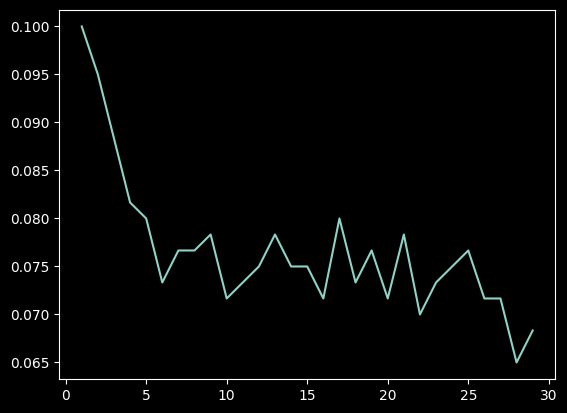

In [29]:
accuracy = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error = 1 - accuracy_score(y_test, y_pred)
    accuracy.append(error)

accuracy_df = pd.DataFrame(accuracy, index=range(1,30), columns=['Accuracy'])
plt.plot(accuracy_df)

In [37]:
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler', scaler), ('knn', knn)]

pipe = Pipeline(operations)

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'knn__n_neighbors': range(1,30)}]

gs = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [58]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': range(1, 30)}],
             scoring='accuracy')

In [60]:
y_pred_gs = gs.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred_gs)

0.9383333333333334

In [64]:
gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 20,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [63]:
gs.best_score_

0.9358333333333333

In [65]:
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       328
           1       0.94      0.93      0.93       272

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [75]:
new = [[3.9, 5.6]]
print(gs.predict(new))
print(gs.predict_proba(new))

[0]
[[0.5 0.5]]


c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
